In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


In [2]:
# Importing the dataset
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values


In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 42)


In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [5]:
# Parameter evaluation with GSC validation
gbe = GradientBoostingClassifier(random_state=42)
parameters={'learning_rate': [0.05, 0.1, 0.5],
            'max_features': [0.5, 1],
            'max_depth': [3, 4, 5]
}
gridsearch=GridSearchCV(gbe, parameters, cv=100, scoring='roc_auc')
gridsearch.fit(X, y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.05, 'max_depth': 3, 'max_features': 0.5}
0.8388020833333334


In [6]:
# Adjusting development threshold
gbi = GradientBoostingClassifier(learning_rate=0.05, max_depth=3,
                                 max_features=0.5,
                                 random_state=42)
X_train,X_test,y_train, y_test = train_test_split(X, y, random_state=42)
gbi.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbi.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbi.score(X_test, y_test)))


Accuracy on training set: 0.882
Accuracy on test set: 0.750


In [7]:
# Storing the prediction
y_pred = gbi.predict_proba(X_test)[:,1]


In [8]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))


TP - True Negative 96
FP - False Positive 27
FN - False Negative 21
TP - True Positive 48
Accuracy Rate: 0.75
Misclassification Rate: 0.25


0.81313

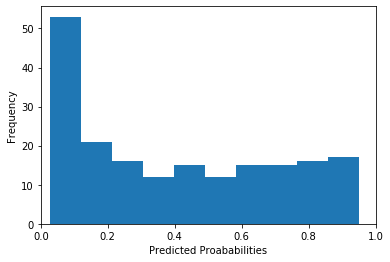

In [9]:
# Plotting the predictions
plt.hist(y_pred,bins=10)
plt.xlim(0,1)
plt.xlabel("Predicted Proababilities")
plt.ylabel("Frequency")

round(roc_auc_score(y_test,y_pred),5)
